# PROJECT2

### PROJECT PROPOSAL

### DATA SOURCE LOCATION: 

#### Data is free and can be accessed from the link https://catalog.data.gov/dataset/patient-survey-ich-cahps.

#### Data consists of 7579 rows and 47 columns.

### Data Description:

* n-Center Hemodialysis Facilites Patient evaluations from the In-Center Hemodialysis Consumer Assessment of Healthcare Providers and Systems (ICH-CAHPS) Survey. The ICH-CAHPS Survey is a national, standardised survey of in-center hemodialysis patients about their experiences with the facility, facility doctors and staff, and care received.

### SOME HYPOTHESIS ON THE DATA:

* 1. IS THE STAR RATING FOR DIALYSIS CENTER FACILITIES HAS A HIGHLIKELYHOOD OF ABOVE 3 ?
* 2. IS THE STAR RATING FOR DIALYSIS CENTER STAFF IS ABOVE 3 ?
* 3. IS THE STAR RATING FACILITIES FOR NEPHROLOGISTS FOR COMMUNICATION AND CARE IS ABOVE 3?
* 4. IS STAR RATING FOR PROVIDING INFORMATION TO PATIENTS IS ABOVE 3 ?
* 5. IS THE STAR RATING FOR QUALITY OF DIALYSIS CENTER FOR CARE AND OPERATIONS IS ABOVE 3 ?
* 6. IS THE STAR RATING FOR NEPHROLOGIST IS ABOVE 3 ?

In [98]:
# including the required libraries

import pandas as pd
import numpy as np
import seaborn as sns # for visualisation
import matplotlib.pyplot as plt # for visualisation
from pandas.plotting import lag_plot # for visualisation
import numpy as np
%matplotlib inline 
sns.set(color_codes=True)

In [99]:
# reading the data frame 

df = pd.read_csv('Patient_survey__ICH_CAHPS_.csv')

### EXPLORATORY DATA ANALYSIS

#### 1. REPLACING THE STRING WITH NA

In [100]:
df = df.replace('Not Available', np.NaN)

#### 2. RENAMING THE NECESSARY COLUMNS

In [101]:
data = df.rename(columns={"Star rating of Nephrologists' communication and caring": "Star_rating_Nephrologists_CC",
                        "Star rating of providing information to patients" : "Star_rating_providing_information_patients",
                        "Star rating of quality of dialysis center care and operations" : "Star_rating_quality_dialysis_center_CO",
                        "Star rating of the nephrologist" : "Star_rating_nephrologist",
                        "Star rating of the dialysis center staff" : "Star_rating_dialysis_center_staff",
                        "Star rating of the dialysis facility" : "Star_rating_dialysis_facility"
                       })
data.head(5)

,Provider number,Network,Facility name,Address line 1,Address line 2,City,State,Zip,County,Phone number,...,Linearized score of rating of the dialysis center staff,Star_rating_dialysis_center_staff,Lower box percent of patients-rating of the dialysis facility,Middle box percent of patients-rating of the dialysis facility,Top box percent of patients-rating of the dialysis facility,Linearized score of rating of the dialysis facility,Star_rating_dialysis_facility,Total number of completed interviews from the Fall and Spring Surveys,Overall ICH CAHPS Survey of patients’ experiences star rating,ICH-CAHPS survey response rate
0,12306,8,CHILDRENS HOSPITAL DIALYSIS,1600 7TH AVENUE SOUTH,NaN,BIRMINGHAM,AL,35233,JEFFERSON,(205) 638-9275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12500,8,FMC CAPITOL CITY,255 S JACKSON STREET,NaN,MONTGOMERY,AL,36104,MONTGOMERY,(334) 263-1028,...,76,1,20,28,52,77,1,38,2,23
2,12501,8,GADSDEN DIALYSIS,409 SOUTH FIRST STREET,NaN,GADSDEN,AL,35901,ETOWAH,(256) 547-2457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12502,8,TUSCALOOSA UNIVERSITY DIALYSIS,220 15TH STREET,NaN,TUSCALOOSA,AL,35401,TUSCALOOSA,(205) 345-6004,...,90,4,6,13,81,92,4,55,4,31
4,12505,8,PCD MONTGOMERY,1001 FOREST AVENUE,NaN,MONTGOMERY,AL,36106,MONTGOMERY,(334) 269-9416,...,87,4,8,24,68,88,3,32,3,36


#### 3. CHANGING THE DATA TYPES FROM OBJECT TO FLOAT

In [102]:
data['Star_rating_Nephrologists_CC'] = data.Star_rating_Nephrologists_CC.astype(float)
data['Star_rating_providing_information_patients'] = data.Star_rating_providing_information_patients.astype(float)
data['Star_rating_quality_dialysis_center_CO'] = data.Star_rating_quality_dialysis_center_CO.astype(float)
data['Star_rating_nephrologist'] = data.Star_rating_nephrologist.astype(float)
data['Star_rating_dialysis_center_staff'] = data.Star_rating_dialysis_center_staff.astype(float)
data['Star_rating_dialysis_facility'] = data.Star_rating_dialysis_facility.astype(float)

In [103]:
data.dtypes

Provider number                                                                    int64
Network                                                                            int64
Facility name                                                                     object
Address line 1                                                                    object
Address line 2                                                                    object
City                                                                              object
State                                                                             object
Zip                                                                                int64
County                                                                            object
Phone number                                                                      object
Profit or Non-Profit                                                              object
Chain owned          

In [104]:
# shape of the data after dropping the columns
data.shape

(7578, 47)

In [105]:
# counting the data before dropping the duplicate rows
data.count()

Provider number                                                                  7578
Network                                                                          7578
Facility name                                                                    7578
Address line 1                                                                   7578
Address line 2                                                                   1083
City                                                                             7578
State                                                                            7578
Zip                                                                              7578
County                                                                           7578
Phone number                                                                     7578
Profit or Non-Profit                                                             7578
Chain owned                                           

In [143]:
#Just for an overview look at all the columns
data.describe(include='all')

,Provider number,Network,Facility name,Address line 1,Address line 2,City,State,Zip,County,Phone number,...,Linearized score of rating of the dialysis center staff,Star_rating_dialysis_center_staff,Lower box percent of patients-rating of the dialysis facility,Middle box percent of patients-rating of the dialysis facility,Top box percent of patients-rating of the dialysis facility,Linearized score of rating of the dialysis facility,Star_rating_dialysis_facility,Total number of completed interviews from the Fall and Spring Surveys,Overall ICH CAHPS Survey of patients’ experiences star rating,ICH-CAHPS survey response rate
count,7578.000000,7578.000000,7578,7578,1083,7578,7578,7578.000000,7578,7578,...,2966,2966.000000,2966,2966,2966,2966,2966.000000,2966,2966,2966
unique,NaN,NaN,7307,7527,602,2998,56,NaN,1261,7528,...,34,NaN,46,51,75,34,NaN,100,5,52
top,NaN,NaN,"TOTAL RENAL CARE, INC.",DIALYSIS UNIT,SUITE 100,HOUSTON,TX,NaN,LOS ANGELES,(787) 292-7979,...,87,NaN,10,17,72,88,NaN,31,4,32
freq,NaN,NaN,33,23,78,107,748,NaN,193,13,...,272,NaN,196,147,110,259,NaN,147,1127,177
mean,314632.654790,9.663632,NaN,NaN,NaN,NaN,NaN,50320.043151,NaN,NaN,...,NaN,3.179366,NaN,NaN,NaN,NaN,3.095415,NaN,NaN,NaN
std,192473.933577,4.706113,NaN,NaN,NaN,NaN,NaN,27564.894402,NaN,NaN,...,NaN,1.248078,NaN,NaN,NaN,NaN,1.114370,NaN,NaN,NaN
min,12306.000000,1.000000,NaN,NaN,NaN,NaN,NaN,603.000000,NaN,NaN,...,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,142810.250000,6.000000,NaN,NaN,NaN,NaN,NaN,29539.500000,NaN,NaN,...,NaN,2.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,322530.500000,9.000000,NaN,NaN,NaN,NaN,NaN,46133.000000,NaN,NaN,...,NaN,3.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
75%,452341.250000,14.000000,NaN,NaN,NaN,NaN,NaN,76051.000000,NaN,NaN,...,NaN,4.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN


#### 4. Dropping the duplicate rows

* This is often a handy thing to do because a huge data set as in this case contains 7578 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. 

In [106]:
# Rows containing duplicate data
duplicated_rows = data[data.duplicated()]
print('number of duplicate rows: ', duplicated_rows.shape)

number of duplicate rows:  (0, 47)


In [107]:
# Dropping the duplicates 
data = data.drop_duplicates()
data.head(5)

,Provider number,Network,Facility name,Address line 1,Address line 2,City,State,Zip,County,Phone number,...,Linearized score of rating of the dialysis center staff,Star_rating_dialysis_center_staff,Lower box percent of patients-rating of the dialysis facility,Middle box percent of patients-rating of the dialysis facility,Top box percent of patients-rating of the dialysis facility,Linearized score of rating of the dialysis facility,Star_rating_dialysis_facility,Total number of completed interviews from the Fall and Spring Surveys,Overall ICH CAHPS Survey of patients’ experiences star rating,ICH-CAHPS survey response rate
0,12306,8,CHILDRENS HOSPITAL DIALYSIS,1600 7TH AVENUE SOUTH,NaN,BIRMINGHAM,AL,35233,JEFFERSON,(205) 638-9275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12500,8,FMC CAPITOL CITY,255 S JACKSON STREET,NaN,MONTGOMERY,AL,36104,MONTGOMERY,(334) 263-1028,...,76,1.0,20,28,52,77,1.0,38,2,23
2,12501,8,GADSDEN DIALYSIS,409 SOUTH FIRST STREET,NaN,GADSDEN,AL,35901,ETOWAH,(256) 547-2457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12502,8,TUSCALOOSA UNIVERSITY DIALYSIS,220 15TH STREET,NaN,TUSCALOOSA,AL,35401,TUSCALOOSA,(205) 345-6004,...,90,4.0,6,13,81,92,4.0,55,4,31
4,12505,8,PCD MONTGOMERY,1001 FOREST AVENUE,NaN,MONTGOMERY,AL,36106,MONTGOMERY,(334) 269-9416,...,87,4.0,8,24,68,88,3.0,32,3,36


#### 5. Dropping the missing or null values

* This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, I just dropped that missing values. 

In [108]:
# Finding the null values.
print(data.isnull().sum())

Provider number                                                                     0
Network                                                                             0
Facility name                                                                       0
Address line 1                                                                      0
Address line 2                                                                   6495
City                                                                                0
State                                                                               0
Zip                                                                                 0
County                                                                              0
Phone number                                                                        0
Profit or Non-Profit                                                                0
Chain owned                                           

## IMPUTATION

#### 1. Histogram of Star Rating of Nephrologists for Communication and Caring

In [ ]:
plt.hist(data['Star_rating_Nephrologists_CC'])
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Histogram of Star Rating of Nephrologists for Communication and Caring',fontsize = 15 )

#### 2. Histogram of Star Rating for providing information to Patients

Text(0.5, 1.0, 'Histogram of Star Rating for providing information to Patients')

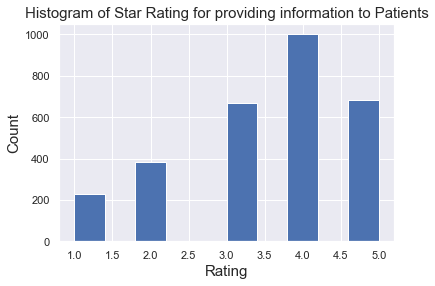

In [110]:
plt.hist(data['Star_rating_providing_information_patients'])
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Histogram of Star Rating for providing information to Patients',fontsize = 15 )

#### 3. Histogram of Star Rating for quality of dialysis center for care and operations

Text(0.5, 1.0, 'Histogram of Star Rating for quality of dialysis center for care and operations')

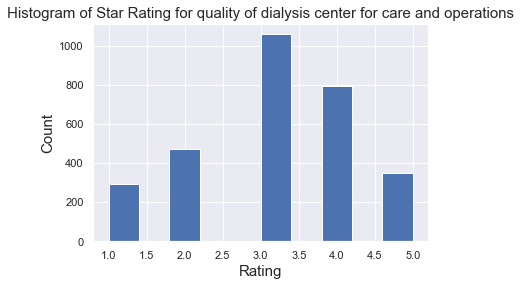

In [111]:
plt.hist(data['Star_rating_quality_dialysis_center_CO'])
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Histogram of Star Rating for quality of dialysis center for care and operations',fontsize = 15 )

#### 4. Histogram of Star Rating for nephrologist

Text(0.5, 1.0, 'Histogram of Star Rating for nephrologist')

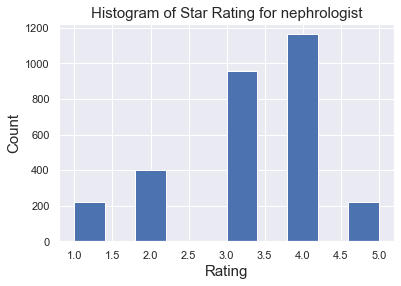

In [112]:
plt.hist(data['Star_rating_nephrologist'])
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Histogram of Star Rating for nephrologist',fontsize = 15 )

#### 5. Histogram of Star Rating for dialysis center staff

Text(0.5, 1.0, 'Histogram of Star Rating for dialysis center staff')

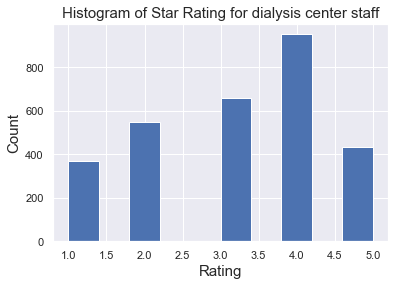

In [113]:
plt.hist(data['Star_rating_dialysis_center_staff'])
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Histogram of Star Rating for dialysis center staff',fontsize = 15 )

#### 6. Histogram of Star Rating for dialysis center facilities

Text(0.5, 1.0, 'Histogram of Star Rating for dialysis center facilities')

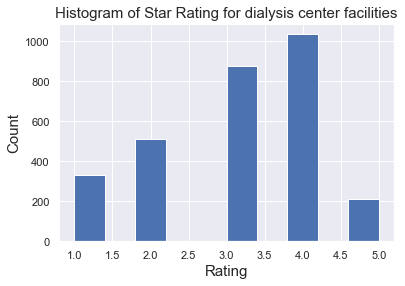

In [114]:
plt.hist(data['Star_rating_dialysis_facility'])
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Histogram of Star Rating for dialysis center facilities',fontsize = 15 )

## HYPOTHESIS

### 1. IS THE STAR RATING FOR DIALYSIS CENTER FACILITIES HAS A HIGHLIKELYHOOD OF ABOVE 3 ?

In [115]:
facilities_rating_Above_3 = []
facilities_rating_Above_3 = data["Star_rating_dialysis_facility"] >= 3.0 

In [116]:
Star_rating_facilities = data["Star_rating_dialysis_facility"].to_list()

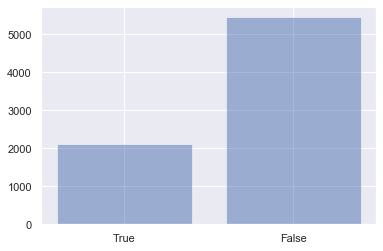

In [117]:
hypothesis_data_facilities = pd.DataFrame(list(zip(Star_rating_facilities, facilities_rating_Above_3)), 
               columns =['Star_rating_facilities', 'facilities_rating_Above_3'])

import numpy as np
T_Count=0
F_Count=0
l1=[]
for i in facilities_rating_Above_3:
    if i==True:
        T_Count+=1
    else:
        F_Count+=1
l1.append(T_Count)
l1.append(F_Count)
y_pos = np.arange(len(l1))
objects=("True","False")
plt.bar(y_pos, l1, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

#Since there are more number of false conditions the hypothesis is wrong

In [118]:
hypothesis_data_facilities.head(5)

,Star_rating_facilities,facilities_rating_Above_3
0,NaN,False
1,1.0,False
2,NaN,False
3,4.0,True
4,3.0,True


### 2. IS THE STAR RATING FOR DIALYSIS CENTER STAFF IS ABOVE 3 ?

In [119]:
Staff_rating_Above_3 = []
Staff_rating_Above_3 = data["Star_rating_dialysis_center_staff"] >= 3.0 

In [120]:
Star_rating_staff = data["Star_rating_dialysis_center_staff"].to_list()

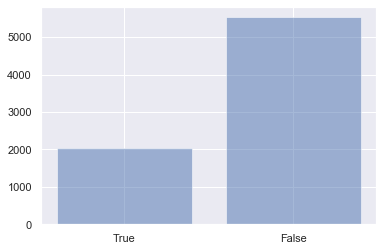

In [121]:
hypothesis_data_staff = pd.DataFrame(list(zip(Star_rating_staff, Staff_rating_Above_3)), 
               columns =['Star_rating_staff', 'Staff_rating_Above_3'])

import numpy as np
T_Count=0
F_Count=0
l1=[]
for i in Staff_rating_Above_3:
    if i==True:
        T_Count+=1
    else:
        F_Count+=1
l1.append(T_Count)
l1.append(F_Count)
y_pos = np.arange(len(l1))
objects=("True","False")
plt.bar(y_pos, l1, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

#Since there are more number of false conditions the hypothesis is wrong

### 3. IS THE STAR RATING FACILITIES FOR NEPHROLOGISTS FOR COMMUNICATION AND CARE IS ABOVE 3?

In [122]:
CC_rating_Above_3 = []
CC_rating_Above_3 = data["Star_rating_Nephrologists_CC"] >= 3.0 

In [123]:
Star_rating_CC = data["Star_rating_Nephrologists_CC"].to_list()

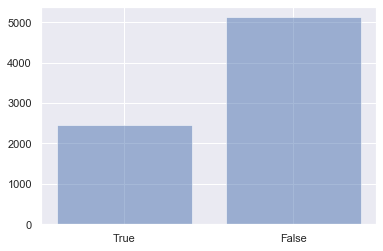

In [124]:
hypothesis_data_staff = pd.DataFrame(list(zip(Star_rating_CC, CC_rating_Above_3)), 
               columns =['Star_rating_CC', 'CC_rating_Above_3'])


import numpy as np
T_Count=0
F_Count=0
l1=[]
for i in CC_rating_Above_3:
    if i==True:
        T_Count+=1
    else:
        F_Count+=1
l1.append(T_Count)
l1.append(F_Count)
y_pos = np.arange(len(l1))
objects=("True","False")
plt.bar(y_pos, l1, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

#Since there are more number of false conditions the hypothesis is wrong

### 4.  IS STAR RATING FOR PROVIDING INFORMATION TO PATIENTS IS ABOVE 3 ?

In [125]:
IP_rating_Above_3 = []
IP_rating_Above_3 = data["Star_rating_providing_information_patients"] >= 3.0

In [126]:
Star_rating_IP = data["Star_rating_providing_information_patients"].to_list()

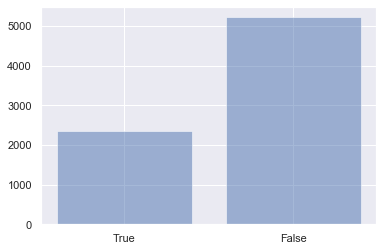

In [127]:
hypothesis_data_IP = pd.DataFrame(list(zip(Star_rating_IP, IP_rating_Above_3)), 
               columns =['Star_rating_IP', 'IP_rating_Above_3'])


import numpy as np
T_Count=0
F_Count=0
l1=[]
for i in IP_rating_Above_3:
    if i==True:
        T_Count+=1
    else:
        F_Count+=1
l1.append(T_Count)
l1.append(F_Count)
y_pos = np.arange(len(l1))
objects=("True","False")
plt.bar(y_pos, l1, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

#Since there are more number of false conditions the hypothesis is wrong

In [128]:
hypothesis_data_IP.head(5)

,Star_rating_IP,IP_rating_Above_3
0,NaN,False
1,1.0,False
2,NaN,False
3,4.0,True
4,4.0,True


### 5. IS THE STAR RATING FOR QUALITY OF DIALYSIS CENTER FOR CARE AND OPERATIONS IS ABOVE 3 ?

In [129]:
CO_rating_Above_3 = []
CO_rating_Above_3 = data["Star_rating_quality_dialysis_center_CO"] >= 3.0

In [130]:
Star_rating_CO = data["Star_rating_providing_information_patients"].to_list()

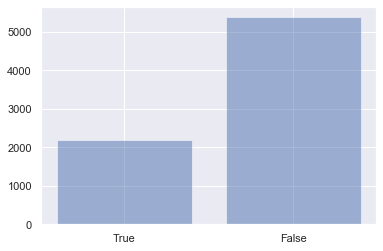

In [131]:
hypothesis_data_CO = pd.DataFrame(list(zip(Star_rating_CO, CO_rating_Above_3)), 
               columns =['Star_rating_CO', 'CO_rating_Above_3'])


import numpy as np
T_Count=0
F_Count=0
l1=[]
for i in CO_rating_Above_3:
    if i==True:
        T_Count+=1
    else:
        F_Count+=1
l1.append(T_Count)
l1.append(F_Count)
y_pos = np.arange(len(l1))
objects=("True","False")
plt.bar(y_pos, l1, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

#Since there are more number of false conditions the hypothesis is wrong

In [132]:
hypothesis_data_CO.head(5)

,Star_rating_CO,CO_rating_Above_3
0,NaN,False
1,1.0,False
2,NaN,False
3,4.0,True
4,4.0,True


### 6. IS THE STAR RATING FOR NEPHROLOGIST IS ABOVE 3 ?

In [133]:
N_rating_Above_3 = []
N_rating_Above_3 = data["Star_rating_nephrologist"] >= 3.0

In [134]:
Star_rating_N = data["Star_rating_nephrologist"].to_list()

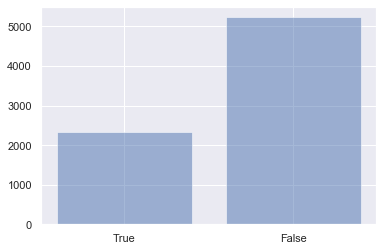

In [135]:
hypothesis_data_N = pd.DataFrame(list(zip(Star_rating_N, N_rating_Above_3)), 
               columns =['Star_rating_N', 'N_rating_Above_3'])



import numpy as np
T_Count=0
F_Count=0
l1=[]
for i in N_rating_Above_3:
    if i==True:
        T_Count+=1
    else:
        F_Count+=1
l1.append(T_Count)
l1.append(F_Count)
y_pos = np.arange(len(l1))
objects=("True","False")
plt.bar(y_pos, l1, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.show()

#Since there are more number of false conditions the hypothesis is wrong